# Tus primeros pasos en Machine Learning

## Objetivo:

Conocer de forma general los pasos a seguir para construir un modelo de aprendizaje automático que pueda resolver un problema en específico. En este workshop vamos a constuir dos modelos de clasificación supervisada para detectar cargos/movimientos fraudulentos en las tarjetas de crédito de los clientes de cierto banco.

## ¡Manos a la computadora!

In [ ]:
# Si tienes instalado Jupyter notebook en tu computadora, puedes descargar el archivo para trabajarlo directamente:
# 
# Descargar el siguiente archivo de Drive
# https://drive.google.com/file/d/1nK8BqSiW2KeuKz7Dzh6tzBWawZWezw1c/view?usp=sharing

# Cargar archivo de base de datos
from google.colab import files

file = files.upload()

In [5]:
# Importar librerías de utilidad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Cargar base de datos a un Pandas DataFrame para poder manipularlo
df = pd.read_csv('baseworkshop.csv', index_col= 'cust_id')

#Si lo estás trabajando desde un IDE en tu computadora, asegúrate de poner la dirección completa al archivo:
# df = pd.read_csv('C:/Users/TuUsuario/TuCarpeta/baseworkshop.csv', index_col= 'cust_id')

Realicemos una breve exploración de nuestra base de datos, con el objetivo de obtener información sobre las variables, su escala de medición y si tenemos datos faltantes:

In [10]:
pd.set_option('max_columns', 20)
print(df.head())

             balance  purchases  installments_purchases  cash_advance  \
cust_id                                                                 
C10001     40.900749      95.40                    95.4      0.000000   
C10002   3202.467416       0.00                     0.0   6442.945483   
C10003   2495.148862     773.17                     0.0      0.000000   
C10004   1666.670542    1499.00                     0.0    205.788017   
C10005    817.714335      16.00                     0.0      0.000000   

         credit_limit     payments  minimum_payments  fraud  
cust_id                                                      
C10001         1000.0   201.802084        139.509787      0  
C10002         7000.0  4103.032597       1072.340217      0  
C10003         7500.0   622.066742        627.284787      0  
C10004         7500.0     0.000000        864.173246      0  
C10005         1200.0   678.334763        244.791237      0  


In [11]:
print(df.shape)

(8950, 8)


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C18950
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   balance                 8950 non-null   float64
 1   purchases               8950 non-null   float64
 2   installments_purchases  8950 non-null   float64
 3   cash_advance            8950 non-null   float64
 4   credit_limit            8950 non-null   float64
 5   payments                8950 non-null   float64
 6   minimum_payments        8950 non-null   float64
 7   fraud                   8950 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 629.3+ KB
None


## Análisis Exploratorio de Datos (EDA)
Una vez confirmado que la base de datos está lista para ser utilizada, comencemos con el análisis exploratorio de los datos (EDA).

Este es un punto muy importante y debe ser lo primero que desarrolles antes de comenzar a construir tus modelos de aprendizaje automático.

In [14]:
X = df.drop('fraud', axis = 1)
X.head()

,balance,purchases,installments_purchases,cash_advance,credit_limit,payments,minimum_payments
cust_id,,,,,,,
C10001,40.900749,95.40,95.4,0.000000,1000.0,201.802084,139.509787
C10002,3202.467416,0.00,0.0,6442.945483,7000.0,4103.032597,1072.340217
C10003,2495.148862,773.17,0.0,0.000000,7500.0,622.066742,627.284787
C10004,1666.670542,1499.00,0.0,205.788017,7500.0,0.000000,864.173246
C10005,817.714335,16.00,0.0,0.000000,1200.0,678.334763,244.791237


In [19]:
print(X.shape)
print(X.describe().T.round(2))

(8950, 7)
                         count     mean      std    min      25%      50%  \
balance                 8950.0  1564.61  2081.50   0.00   128.28   873.94   
purchases               8950.0  1003.20  2136.63   0.00    39.64   361.28   
installments_purchases  8950.0   411.07   904.34   0.00     0.00    89.00   
cash_advance            8950.0   978.98  2086.58   0.00     0.00     0.00   
credit_limit            8950.0  4494.45  3638.61  50.00  1600.00  3000.00   
payments                8950.0  1733.14  2895.06   0.00   383.28   856.90   
minimum_payments        8950.0   864.17  2330.50   0.02   170.88   335.69   

                            75%       max  
balance                 2054.14  19043.14  
purchases               1110.13  49039.57  
installments_purchases   468.64  22500.00  
cash_advance            1096.91  47137.21  
credit_limit            6500.00  30000.00  
payments                1901.13  50721.48  
minimum_payments         864.17  76406.21  


¿Qué análisis puedes obtener de la estadística descriptiva de las variables explicativas? ¿Qué tipo de variables son? ¿Cuál es su escala de medición? ¿El rango de las variables puede ser un problema para la estimación?

¡Analizar la información es súper importante!

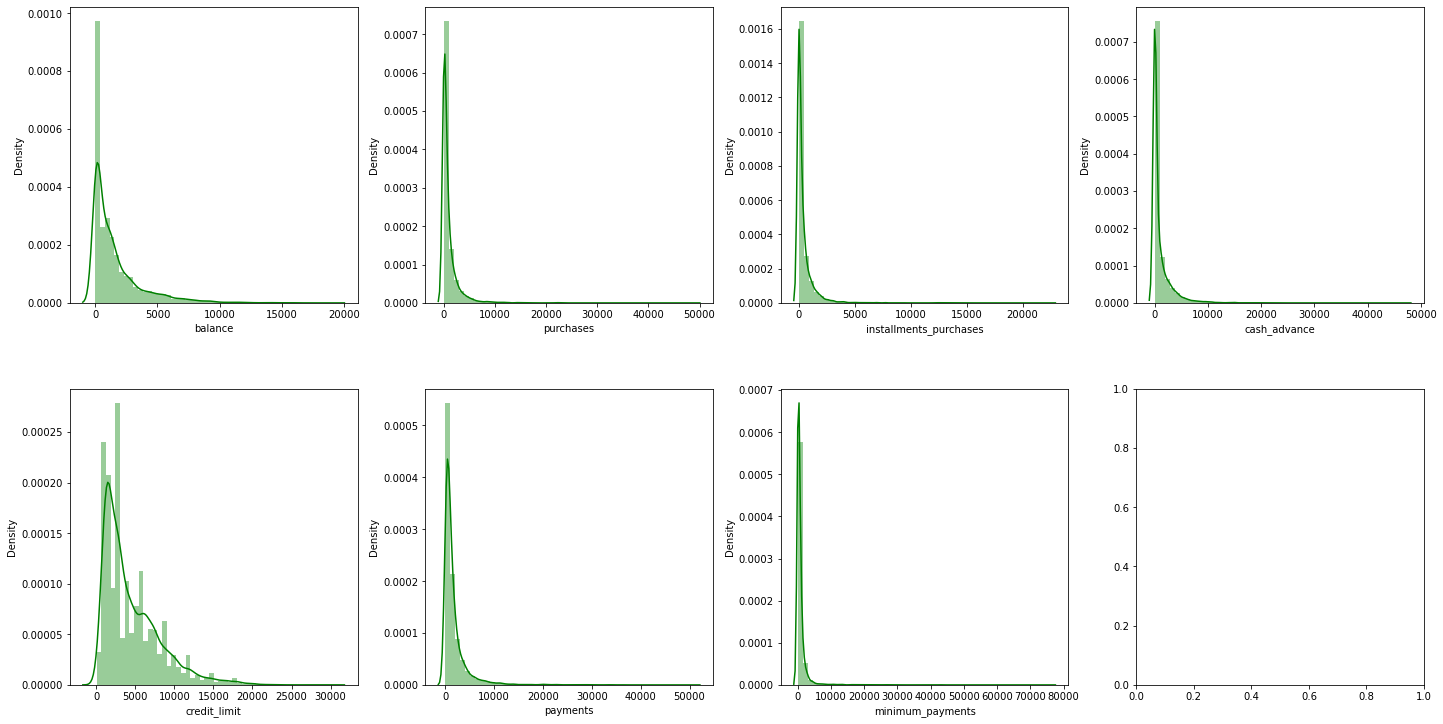

In [20]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in X.items():
    sns.distplot(value, color='g', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

¿Qué implicaciones tiene la distribución de los variables sobre el poder explicativo de nuestros modelos de clasificación? 

(8950,)
   y_variable  percentage_count
1           1          0.007821
0           0          0.992179


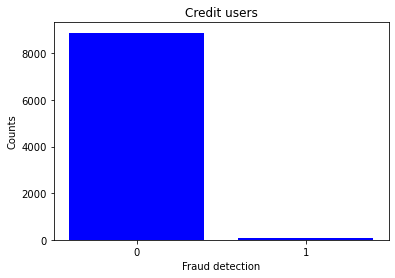

In [22]:
y = df['fraud']
print(y.shape)
print(y.value_counts(normalize = True).reset_index().rename(columns = {'index': 'y_variable', 'fraud': 'percentage_count'}).sort_values(by = "percentage_count"))

labels, counts = np.unique(y, return_counts=True)
plt.bar(labels, counts, align='center', color = "b")
plt.title('Credit users')
plt.xlabel('Fraud detection')
plt.ylabel("Counts")
plt.xticks(labels)
plt.show()

¿Qué reto podría representar tener una distribución de frecuencias como esta?

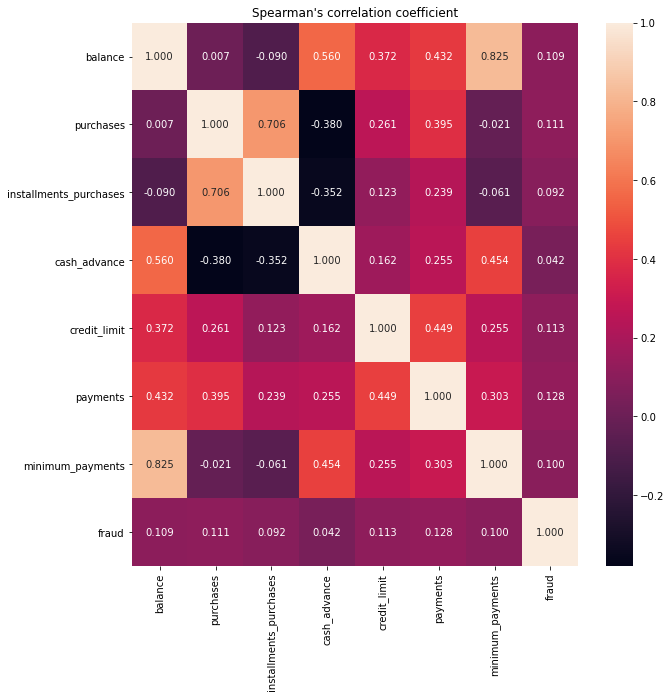

In [23]:
corr_spearman = df.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_spearman, annot = True, fmt=".3f").set_title(
    "Spearman's correlation coefficient")
plt.show()

Ahora sí, ¿qué podemos concluir respecto a la clasificación de nuestras variables explicativas y nuestra variable objetivo?

## Supervised Machine Learning

Con todo el análisis exploratorio de datos ya tenemos una idea detallada del comportamiento de nuestros datos y de cómo debemos procesarlos para dárselos a nuestro modelo.

¿Están listos? ¡Es momento de construir nuestros primeros algoritmos y entrenarlos!

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [25]:
# Vamos a hacer una transformación logarítmica de nuestras variables explicativas
pwt = PowerTransformer()
X_pwt = pwt.fit_transform(X)

¿Recuerdas cómo debemos entrenar nuestro modelo?

Tenemos que darle una serie de ejercicios de prueba y luego ponerlo a prueba con datos que nunca antes haya visto ... pero que podamos evaluar para medir su desempeño.

Vamos a separar nuestra base de datos, de forma aleatoria, en un conjunto para entrenamiento y otro para prueba

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_pwt, y, test_size=0.40, random_state=42)

### Clasificador Ingenuo de Bayes

In [27]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train) #Entrena el modelo
y_pred_nb = NaiveBayes.predict(X_test) #Genera la predicción

In [28]:
print("Presión del modelo en el subconjunto de entrenamiento: {}".format(NaiveBayes.score(X_train, y_train).round(4)))

Presión del modelo en el subconjunto de entrenamiento: 0.9791


In [29]:
print("Presión del modelo en el subconjunto de prueba: {}".format(NaiveBayes.score(X_test, y_test).round(4)))

Presión del modelo en el subconjunto de prueba: 0.9802


In [30]:
print(confusion_matrix(y_test, y_pred_nb))

[[3487   66]
 [   5   22]]


### Regresión logística

In [31]:
LogisticRegression = LogisticRegression()
LogisticRegression.fit(X_train, y_train) #Entrena el modelo
y_pred_lr = LogisticRegression.predict(X_test) #Genera la predicción

In [32]:
print("Presión del modelo en el subconjunto de entrenamiento: {}".format(LogisticRegression.score(X_train, y_train).round(4)))

Presión del modelo en el subconjunto de entrenamiento: 0.9953


In [33]:
print("Presión del modelo en el subconjunto de prueba: {}".format(LogisticRegression.score(X_test, y_test).round(4)))

Presión del modelo en el subconjunto de prueba: 0.9953


In [34]:
print(confusion_matrix(y_test, y_pred_lr))

[[3551    2]
 [  15   12]]


¿Cuál es el mejor modelo?

¿Se puede hacer algo adicional para mejorar el modelo?

## Automatización

Supongamos que durante el último mes, el banco ha registrado en algunas cuentas de de sus clientes movimientos que posiblemente son fraudulentos ... ¿cómo podría ayudarnos nuestro modelo?

In [35]:
# El siguiente arreglo muestra la información de los clientes con sospecha de cargo fraudulento
X_new = X[105:156]
print(X_new)

              balance  purchases  installments_purchases  cash_advance  \
cust_id                                                                  
C10106    2441.542991     808.00                    0.00    959.857263   
C10107     408.656365     941.64                  941.64      0.000000   
C10108    4986.400804       0.00                    0.00   5439.467563   
C10109    1246.624558     423.70                  246.06    412.399058   
C10110    6644.201651    4478.75                 1757.16   7205.520805   
C10111     156.216753    1354.86                  769.23      0.000000   
C10112    3393.351236       0.00                    0.00   1008.348672   
C10113    5322.994094    2812.20                 1955.08   2510.352951   
C10114    6458.562090       0.00                    0.00   3360.228794   
C10115     175.341651    1508.90                  256.54      0.000000   
C10116     680.195157    1045.57                  377.62      0.000000   
C10117     223.763616    2309.78      

In [36]:
# Debemos transformar nuevamente los datos
X_new_pwt = pwt.fit_transform(X_new)
print(X_new_pwt)

[[ 0.3115462   0.09199023 -1.1781001   0.94303995 -0.52472351 -0.52337434
   0.32979697]
 [-0.70135479  0.16244733  0.73557229 -0.96343766 -1.06233439 -0.11597699
  -1.14519163]
 [ 0.80924378 -1.57005708 -1.1781001   1.31036632  0.35038052 -0.0385737
   0.58619933]
 [-0.10547953 -0.18211003  0.28823478  0.74975178 -1.30298123 -0.48208149
  -0.24737143]
 [ 1.02670117  1.0203812   0.95811664  1.36633686  0.50954859  1.83056681
   0.9799431 ]
 [-1.13201355  0.33900617  0.6654559  -0.96343766 -0.13538944 -0.26299347
  -1.59782915]
 [ 0.53358993 -1.57005708 -1.1781001   0.95401785 -0.46642591 -2.09869245
   0.19551568]
 [ 0.85781668  0.73535222  0.99715577  1.15139422  0.43191068  0.08959554
   0.76543788]
 [ 1.00476368 -1.57005708 -1.1781001   1.2122219   0.17372359 -0.02011589
   1.05860958]
 [-1.08395946  0.39381793  0.30150988 -0.96343766 -0.25412053  0.24331172
  -1.38039643]
 [-0.44300486  0.21192077  0.42645254 -0.96343766 -0.85884864 -0.50472356
  -0.99918622]
 [-0.97930577  0.62268

In [37]:
# Vamos a usar nuestro modelo para predecir cuáles son potencialmente fraudulentos
y_new_pred = NaiveBayes.predict(X_new_pwt)
print(y_new_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
